In [0]:
#importing packages
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet

In [0]:
#setting directory path

os.chdir('C:\\Users\\Kanika Saini\\Downloads\\final report (2)\\final report\\without cheating variable')

In [0]:
#importing dataset

x=pd.read_excel('LUAD_350_NoDepth.xlsx',index_col=0)
y=pd.read_excel('survival_LUAD.xlsx')

In [0]:
#converting data frame to numpy array

x=np.array(x)
y=np.array(y)

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


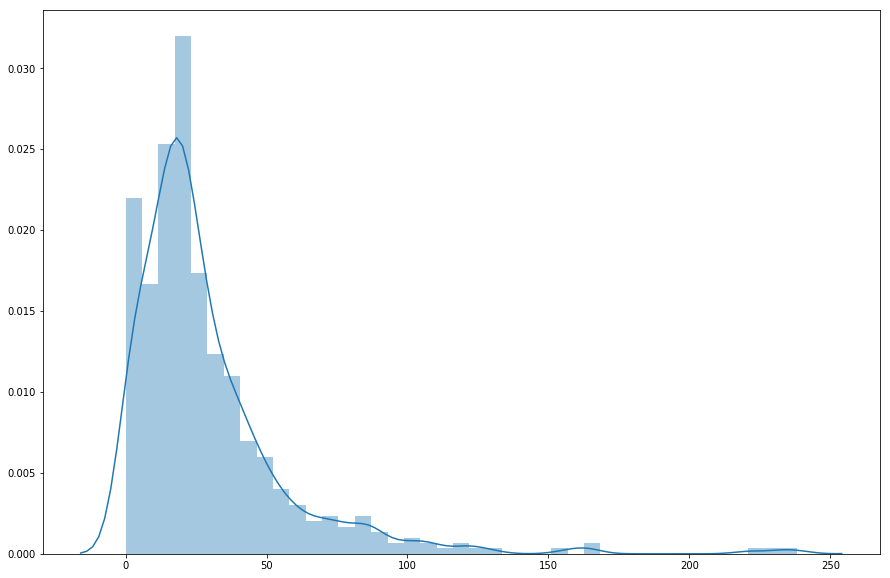

In [0]:
#plot distribution of data

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

In [0]:
#split data to train, test, validation split (80/20)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [0]:

ENreg = ElasticNet(alpha=10, l1_ratio=0.9, normalize=False)
ENreg.fit(X_train,y_train)
pred_cv = ENreg.predict(X_val)

In [0]:
#predicting on validation split

y_predval = ENreg.predict(X_val)

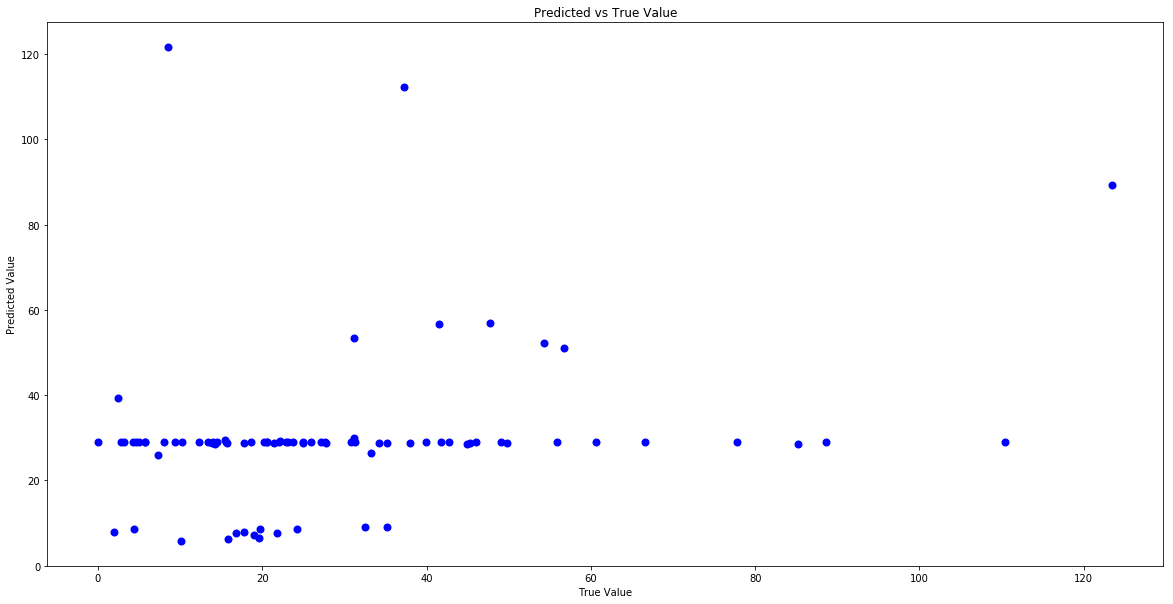

In [0]:
#True value ~ Predicted Value

plt.figure(figsize=(20,10))
plt.scatter(y_val, y_predval, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ENreg.score(X_val, y_val))

18.078162247837312
662.2065397268193
25.73337404474624
Variance score: -0.21


In [0]:
# KFOlD
estimator = ENreg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[ 0.04582309  0.0808449  -0.20754171 -0.08683343  0.49554662 -0.37130632
  0.45180579  0.06388178  0.11323172 -0.62547049]
-0.004001803139155369 0.32477192920290904


In [0]:
# Hyper parameter optimization

tuned_parameters = {'alpha':[0.1,0.5,1.10,20,30,50,100],
                    'l1_ratio':[0.1,0.2,0.4,0.6,0.9,1.0],
                     'fit_intercept':[True,False],
                     'max_iter':[1,2,5,10,20],
                     'random_state':[0,1,42],
                    'tol':[0.001,0.1,0.5]}
ENreg=ElasticNet()
grid=GridSearchCV(ENreg,tuned_parameters,scoring='r2',verbose=1,cv=10)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [0]:
print(grid.best_params_)

{'alpha': 100, 'fit_intercept': True, 'l1_ratio': 1.0, 'max_iter': 1, 'random_state': 0, 'tol': 0.001}


In [0]:

ENreg = ElasticNet(alpha=100, fit_intercept=True,l1_ratio=1.0,max_iter=1,random_state=0,tol=0.001)
ENreg.fit(X_train,y_train)
pred_cv = ENreg.predict(X_val)

In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ENreg.score(X_val, y_val))

18.078162247837312
662.2065397268193
25.73337404474624
Variance score: -0.21


In [0]:
# KFOlD
estimator = ENreg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[ 0.0499924   0.07966767  0.05309169 -0.14292684  0.4521726  -0.34274822
  0.44035687  0.05628995  0.11131176 -0.56560838]
0.01915994992152008 0.29660482634617985


In [0]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
ENreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ENreg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % ENreg.score(X_test, y_test))


20.921923644198362
1315.3103232735161
36.26720727149412
Variance score: 0.04


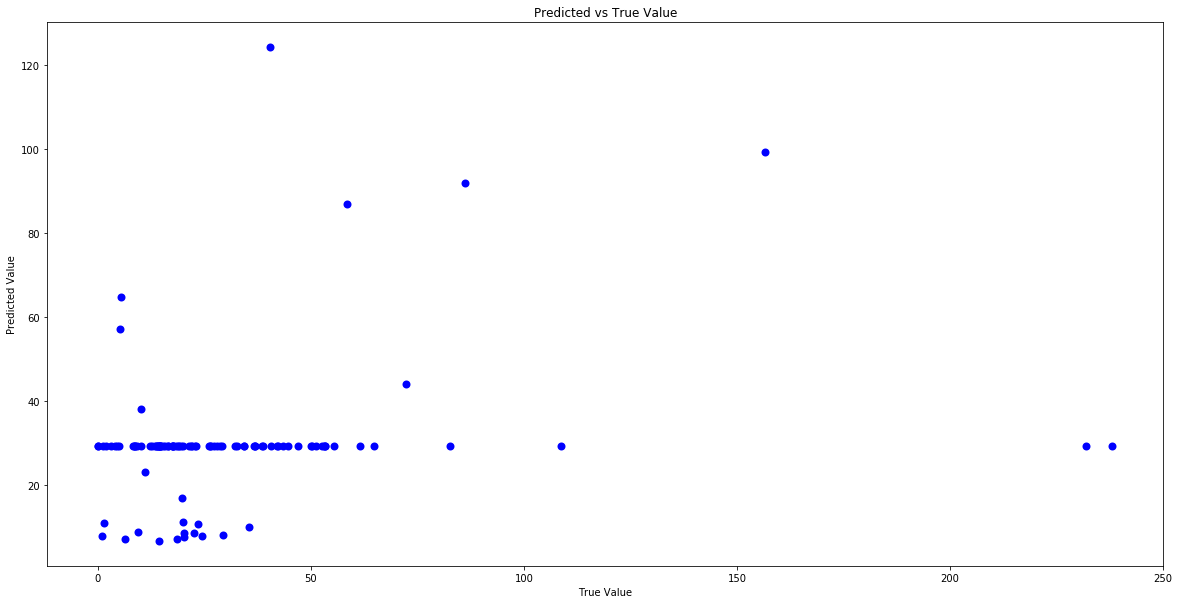

In [0]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()